In [168]:
import numpy as np
import pandas as pd
import time
from matplotlib import pyplot as plt
import os
from collections import OrderedDict
import sys
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
import math

data_base = "C:\\Users\\wenyang.zhang\\Documents\\MySpace\\Workspace\\SalesAnalies\\data\\csv"

In [169]:
file_name = "data(2).csv"
#print("load data: ", file_name)
file_path = os.path.join(data_base, file_name)
data = pd.read_csv(file_path)
data.head(2)

,Unnamed: 0,Region,Sub Region,Area,Outlet No,Outlet Name,Account,Product Line (EN),Product Line (CN),Material NO,...,201806,201807,201808,201809,201810,201811,201812,201901,201902,201903
0,0,EOC,AnHui,HeFeiQuYu,13953003,家乐福合肥长江店,家乐福,NaN,NaN,2041666,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN
1,1,EOC,AnHui,HeFeiQuYu,13953003,家乐福合肥长江店,家乐福,Enfa Import,Enfa进口,2034052,...,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [170]:
groupall = data.groupby(["Region", "Sub Region", "Material NO"])
groupall = groupall.sum()
groupall.drop(["Unnamed: 0", "Outlet No"], inplace=True, axis=1)
groupall.head(50)

201801  201802  201803  201804  201805  201806  \
Region Sub Region Material NO                                                   
EOC    AnHui      2019178         0.0     0.0     0.0     0.0     0.0     0.0   
                  2019181         0.0     0.0     0.0     0.0     0.0     0.0   
                  2022688        20.0    10.0    13.0     0.0    36.0     6.0   
                  2022723         0.0     0.0     0.0     0.0     0.0     4.0   
                  2022725         0.0     0.0     0.0     1.0     0.0     0.0   
                  2022727         0.0     1.0     0.0     0.0     0.0     0.0   
                  2022739         0.0     0.0     6.0     3.0     0.0     0.0   
                  2022746         0.0     0.0     0.0     0.0     0.0     0.0   
                  2022753         5.0    -1.0     0.0     0.0     0.0     0.0   
                  2022757       298.0   408.0   101.0   125.0   169.0    53.0   
                  2022760       682.0   629.0   820.0   394.0   249.0   195.0   
                  2022764         0.0     1.0     1.0     0.0    -1.0     0.0   
                  2022767         0.0     0.0     1.0    -1.0    -1.0     3.0   
                  2022854         0.0     0.0     0.0     0.0     1.0     0.0   
                  2022855         8.0     1.0     2.0     0.0     0.0     0.0   
                  2022858         1.0     0.0     0.0     0.0     0.0     0.0   
                  2022861      1503.0  1458.0  1206.0   419.0   483.0   122.0   
                  2022864        88.0    22.0    26.0    47.0    37.0     9.0   
                  2023614         0.0     0.0     0.0    13.0   -15.0    29.0   
                  2024424       149.0   240.0   271.0   170.0   196.0   264.0   
                  2024425       128.0   288.0   315.0   329.0   291.0   296.0   
                  2024426       117.0    90.0   154.0   106.0    79.0   151.0   
                  2024427       202.0   304.0   257.0   213.0   251.0   354.0   
                  2024428         0.0     0.0     0.0     0.0    39.0    66.0   
                  2024574         0.0     0.0     0.0     0.0     0.0     0.0   
                  2024575         3.0    18.0     9.0     1.0    11.0    -5.0   
                  2024576         2.0     6.0     0.0     0.0     0.0    27.0   
                  2024629        47.0     3.0     6.0    24.0     8.0     2.0   
                  2024922         4.0    17.0    19.0    13.0   -31.0     4.0   
                  2025522       588.0   493.0   511.0   395.0   394.0   378.0   
                  2027091      1244.0   705.0   618.0   248.0   156.0   184.0   
                  2027094         4.0    13.0    12.0     7.0     9.0     0.0   
                  2027955       299.0   319.0   270.0   244.0   212.0   195.0   
                  2027990        97.0   227.0   119.0   260.0   184.0   109.0   
                  2028119      1915.0  2393.0  1818.0  1001.0   803.0   655.0   
                  2028121      2243.0  2366.0  1974.0  1346.0   896.0   542.0   
                  2028123      5512.0  4159.0  2749.0  1288.0   802.0   370.0   
                  2028455      1123.0  1339.0  1722.0  1564.0  1384.0  1270.0   
                  2028457       483.0   459.0   855.0   687.0   655.0   717.0   
                  2029562         3.0    -1.0     5.0     0.0     0.0     1.0   
                  2029565        79.0    43.0    40.0    -2.0    29.0    10.0   
                  2030129        17.0    11.0    26.0     5.0     0.0     2.0   
                  2030130         2.0     0.0     0.0     0.0    19.0    28.0   
                  2030132       236.0    98.0   114.0   107.0   172.0    44.0   
                  2030147         6.0    17.0    20.0     5.0    19.0    13.0   
                  2030148        30.0     0.0    14.0     3.0    12.0    38.0   
                  2030149       249.0   293.0   338.0   173.0   325.0   105.0   
                  2030150        21.0    55.0    11.0     0.0 

In [171]:
groupall_diff = groupall.diff(axis=1)
groupall_diff.fillna(0, inplace=True)
groupall_diff.head(50)

201801  201802  201803  201804  201805  201806  \
Region Sub Region Material NO                                                   
EOC    AnHui      2019178         0.0     0.0     0.0     0.0     0.0     0.0   
                  2019181         0.0     0.0     0.0     0.0     0.0     0.0   
                  2022688         0.0   -10.0     3.0   -13.0    36.0   -30.0   
                  2022723         0.0     0.0     0.0     0.0     0.0     4.0   
                  2022725         0.0     0.0     0.0     1.0    -1.0     0.0   
                  2022727         0.0     1.0    -1.0     0.0     0.0     0.0   
                  2022739         0.0     0.0     6.0    -3.0    -3.0     0.0   
                  2022746         0.0     0.0     0.0     0.0     0.0     0.0   
                  2022753         0.0    -6.0     1.0     0.0     0.0     0.0   
                  2022757         0.0   110.0  -307.0    24.0    44.0  -116.0   
                  2022760         0.0   -53.0   191.0  -426.0  -145.0   -54.0   
                  2022764         0.0     1.0     0.0    -1.0    -1.0     1.0   
                  2022767         0.0     0.0     1.0    -2.0     0.0     4.0   
                  2022854         0.0     0.0     0.0     0.0     1.0    -1.0   
                  2022855         0.0    -7.0     1.0    -2.0     0.0     0.0   
                  2022858         0.0    -1.0     0.0     0.0     0.0     0.0   
                  2022861         0.0   -45.0  -252.0  -787.0    64.0  -361.0   
                  2022864         0.0   -66.0     4.0    21.0   -10.0   -28.0   
                  2023614         0.0     0.0     0.0    13.0   -28.0    44.0   
                  2024424         0.0    91.0    31.0  -101.0    26.0    68.0   
                  2024425         0.0   160.0    27.0    14.0   -38.0     5.0   
                  2024426         0.0   -27.0    64.0   -48.0   -27.0    72.0   
                  2024427         0.0   102.0   -47.0   -44.0    38.0   103.0   
                  2024428         0.0     0.0     0.0     0.0    39.0    27.0   
                  2024574         0.0     0.0     0.0     0.0     0.0     0.0   
                  2024575         0.0    15.0    -9.0    -8.0    10.0   -16.0   
                  2024576         0.0     4.0    -6.0     0.0     0.0    27.0   
                  2024629         0.0   -44.0     3.0    18.0   -16.0    -6.0   
                  2024922         0.0    13.0     2.0    -6.0   -44.0    35.0   
                  2025522         0.0   -95.0    18.0  -116.0    -1.0   -16.0   
                  2027091         0.0  -539.0   -87.0  -370.0   -92.0    28.0   
                  2027094         0.0     9.0    -1.0    -5.0     2.0    -9.0   
                  2027955         0.0    20.0   -49.0   -26.0   -32.0   -17.0   
                  2027990         0.0   130.0  -108.0   141.0   -76.0   -75.0   
                  2028119         0.0   478.0  -575.0  -817.0  -198.0  -148.0   
                  2028121         0.0   123.0  -392.0  -628.0  -450.0  -354.0   
                  2028123         0.0 -1353.0 -1410.0 -1461.0  -486.0  -432.0   
                  2028455         0.0   216.0   383.0  -158.0  -180.0  -114.0   
                  2028457         0.0   -24.0   396.0  -168.0   -32.0    62.0   
                  2029562         0.0    -4.0     6.0    -5.0     0.0     1.0   
                  2029565         0.0   -36.0    -3.0   -42.0    31.0   -19.0   
                  2030129         0.0    -6.0    15.0   -21.0    -5.0     2.0   
                  2030130         0.0    -2.0     0.0     0.0    19.0     9.0   
                  2030132         0.0  -138.0    16.0    -7.0    65.0  -128.0   
                  2030147         0.0    11.0     3.0   -15.0    14.0    -6.0   
                  2030148         0.0   -30.0    14.0   -11.0     9.0    26.0   
                  2030149         0.0    44.0    45.0  -165.0   152.0  -220.0   
                  2030150         0.0    34.0   -44.0   -11.0 

shape(y_salesForManth):  (2883, 15)
avg_score:  [-21.21579336]
ok count:  422
数据总数:  2883


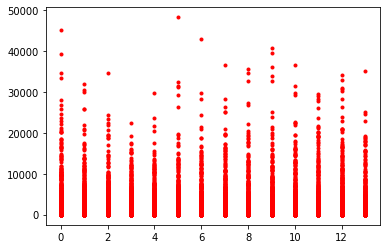

In [172]:
group_count = np.shape(groupall_diff)[0]
#group_count = 100 # 用于测试，指定个数
test_count = 1
x_month_range = range(14)
total_score = 0
#y_salesForManth = groupall_diff.values
y_salesForManth = groupall.values
print("shape(y_salesForManth): ", np.shape(y_salesForManth))
i = 0
count = 0
ok_count = 0
ok_index = []
error_index = []
acc_caculated_count = 0
invalid_count = 0
while(count < group_count):
    y_salesForManth_scaled = y_salesForManth[i]
    #y_salesForManth_scaled = scaler.fit_transform(np.array(y_salesForManth_raw).reshape(-1,1))
    y_train = y_salesForManth_scaled[0:(-1 * test_count)]
    y_test = y_salesForManth_scaled[(-1 * test_count):].flatten()
    #print("y_test: ", y_test)
    if(y_test == 0):
        #print("数据全0，跳过：", i)
        i += 1
        count +=1
        error_index.append(i)
        continue
    #print("发现一个有值的: ", y_test)
    #plt.plot(x_month_range, y_train, "b.")
    x2 = np.array(x_month_range).reshape(-1,1)
    y2 = np.array(y_train).reshape(-1,1)
    plt.plot(x2, y2, "r.")
    #sgd_reg2 = SGDRegressor(random_state=42)
    sgd_reg2 = LinearRegression()
    sgd_reg2.fit(x2, y2.ravel())

    y_predict_fit = sgd_reg2.predict(x2)
    #plt.plot(x2, y_predict_fit, "y-")

    y_predict_future = sgd_reg2.predict([[14]])
    
    acc = 1- np.abs((y_predict_future - y_test)/y_test)
    #print("acc: ", acc)
    if(acc == np.inf or acc == -np.inf or math.isnan(acc)):
#         print("acc value is invallid: ", acc)
        pass
    else:
        total_score += acc
        acc_caculated_count+=1
    
    #print("y_predict_future: \n", y_predict_future, "y_test: \n", y_test)
    
    #print("shape(y_predict_future): ", y_predict_future)
#     print("acc: ", acc)
#     print("y_predict_future_inverse: ", y_predict_future_inverse)
#     print("y_test: ", y_salesForManth_raw[(-1 * test_count):])
#     print("-------------------------------------------------------")
    
    # 成功失败索引装进各自的list中
    if(len(acc[acc>0.6]) == 1):
        ok_count += 1
        ok_index.append(i)
    else:
        error_index.append(i)
    i+=1
    count +=1
    
        #print("01 ~ 03: \n", scaler.inverse_transform(y_salesForManth[i, :]))
        #print("y_test: \n", scaler.inverse_transform(y_test))
        #print("predict value: \n", scaler.inverse_transform(y_predict_future))
    #print("accuraty rate: ", acc)
    #print("total_score", total_score)
    
avg_score = total_score/acc_caculated_count
print("avg_score: ", avg_score)
print("ok count: ", ok_count)
print("数据总数: ", i)

#### 测试一下增删列是否好用

In [118]:
#groupall["id"] = range(1, len(groupall.values) + 1)
#groupall.values[1]
#del groupall["Name"]
# inserted_columns = groupall.columns.tolist()
# inserted_columns = inserted_columns.insert(1,"id")
# groupall.reindex(columns=inserted_columns)
# groupall["id"] = range(1, len(groupall.values) + 1)
# groupall.head(2)
#groupall.insert(0, "id", range(1, len(groupall.values) + 1))
#groupall.insert(1, "Name", "")
#groupall["Name"] = groupall.index[0].values
print("error_index size: ", len(error_index))
print("OK_index size: ", len(ok_index))
len(groupall.drop(groupall.index[error_index], inplace=False).values)


error_index size:  2461
OK_index size:  422


793

#### 验证一下过滤的数据是否学习效率提高了，过滤是否成功

shape(y_salesForManth):  (793, 15)
avg_score:  [0.81280793]
ok count:  370
数据总数:  793


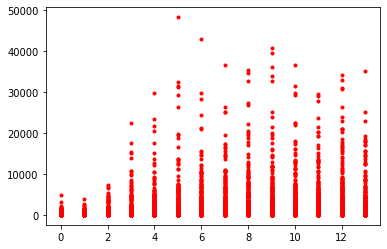

In [173]:
groupall_filtered = groupall.drop(groupall.index[error_index], inplace=False)
group_count = np.shape(groupall_filtered)[0]
#group_count = 100 # 用于测试，指定个数
test_count = 1
x_month_range = range(14)
total_score = 0
#y_salesForManth = groupall_diff.values
y_salesForManth = groupall_filtered.values
print("shape(y_salesForManth): ", np.shape(y_salesForManth))
i = 0
count = 0
ok_count = 0
ok_index = []
error_index = []
acc_caculated_count = 0
invalid_count = 0
while(count < group_count):
    y_salesForManth_scaled = y_salesForManth[i]
    #y_salesForManth_scaled = scaler.fit_transform(np.array(y_salesForManth_raw).reshape(-1,1))
    y_train = y_salesForManth_scaled[0:(-1 * test_count)]
    y_test = y_salesForManth_scaled[(-1 * test_count):].flatten()
    #print("y_test: ", y_test)
    if(y_test == 0):
        #print("数据全0，跳过：", i)
        i += 1
        count +=1
        error_index.append(i)
        continue
    #print("发现一个有值的: ", y_test)
    #plt.plot(x_month_range, y_train, "b.")
    x2 = np.array(x_month_range).reshape(-1,1)
    y2 = np.array(y_train).reshape(-1,1)
    plt.plot(x2, y2, "r.")
    #sgd_reg2 = SGDRegressor(random_state=42)
    sgd_reg2 = LinearRegression()
    sgd_reg2.fit(x2, y2.ravel())

    y_predict_fit = sgd_reg2.predict(x2)
    #plt.plot(x2, y_predict_fit, "y-")

    y_predict_future = sgd_reg2.predict([[14]])
    
    acc = 1- np.abs((y_predict_future - y_test)/y_test)
    #print("acc: ", acc)
    if(acc == np.inf or acc == -np.inf or math.isnan(acc)):
#         print("acc value is invallid: ", acc)
        pass
    else:
        total_score += acc
        acc_caculated_count+=1
    
    #print("y_predict_future: \n", y_predict_future, "y_test: \n", y_test)
    
    #print("shape(y_predict_future): ", y_predict_future)
#     print("acc: ", acc)
#     print("y_predict_future_inverse: ", y_predict_future_inverse)
#     print("y_test: ", y_salesForManth_raw[(-1 * test_count):])
#     print("-------------------------------------------------------")
    
    # 成功失败索引装进各自的list中
    if(len(acc[acc>0.6]) == 1):
        ok_count += 1
        ok_index.append(i)
    else:
        error_index.append(i)
    i+=1
    count +=1
    
        #print("01 ~ 03: \n", scaler.inverse_transform(y_salesForManth[i, :]))
        #print("y_test: \n", scaler.inverse_transform(y_test))
        #print("predict value: \n", scaler.inverse_transform(y_predict_future))
    #print("accuraty rate: ", acc)
    #print("total_score", total_score)
    
avg_score = total_score/acc_caculated_count
print("avg_score: ", avg_score)
print("ok count: ", ok_count)
print("数据总数: ", i)

In [145]:
# 将过滤的数据放入csv文件中
groupall_filtered.insert(0, "id", range(1, len(groupall_filtered)+1))

In [147]:
groupall_filtered.to_clipboard()

#### 尝试使用MSE来评估学习效果

In [163]:
from sklearn.metrics import mean_squared_error

x: 
 [[ 0.  1.  2. ... 11. 12. 13.]
 [ 0.  1.  2. ... 11. 12. 13.]
 [ 0.  1.  2. ... 11. 12. 13.]
 ...
 [ 0.  1.  2. ... 11. 12. 13.]
 [ 0.  1.  2. ... 11. 12. 13.]
 [ 0.  1.  2. ... 11. 12. 13.]]
shape(y_salesForManth):  (793, 15)
avg_score:  [0.81280793]
ok count:  370
数据总数:  793
MSE:  1717375.4586082767


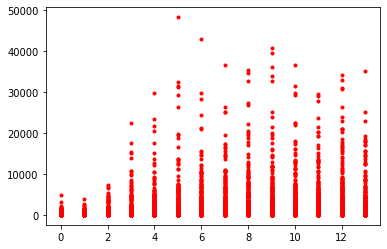

In [174]:

#groupall_filtered = groupall.drop(groupall.index[error_index], inplace=False)
group_count = np.shape(groupall_filtered)[0]
#group_count = 100 # 用于测试，指定个数
test_count = 1
x_month_range = range(14)
x = np.zeros((group_count, len(x_month_range)))
for i in range(group_count):
    x[i] = list(x_month_range)
print("x: \n", x)
total_score = 0
#y_salesForManth = groupall_diff.values
y_salesForManth = groupall_filtered.values
print("shape(y_salesForManth): ", np.shape(y_salesForManth))
i = 0
count = 0
ok_count = 0
ok_index = []
error_index = []
acc_caculated_count = 0
invalid_count = 0
lst_predict = []
lst_test = []
while(count < group_count):
    y_salesForManth_scaled = y_salesForManth[i]
    #y_salesForManth_scaled = scaler.fit_transform(np.array(y_salesForManth_raw).reshape(-1,1))
    y_train = y_salesForManth_scaled[0:(-1 * test_count)]
    y_test = y_salesForManth_scaled[(-1 * test_count):].flatten()
    #print("y_test: ", y_test)
    if(y_test == 0):
        #print("数据全0，跳过：", i)
        i += 1
        count +=1
        error_index.append(i)
        continue
    #print("发现一个有值的: ", y_test)
    #plt.plot(x_month_range, y_train, "b.")
    x2 = np.array(x_month_range).reshape(-1,1)
    y2 = np.array(y_train).reshape(-1,1)
    plt.plot(x2, y2, "r.")
    #sgd_reg2 = SGDRegressor(random_state=42)
    sgd_reg2 = LinearRegression()
    sgd_reg2.fit(x2, y2.ravel())

    y_predict_fit = sgd_reg2.predict(x2)
    #plt.plot(x2, y_predict_fit, "y-")

    y_predict_future = sgd_reg2.predict([[14]])
    
    acc = 1- np.abs((y_predict_future - y_test)/y_test)
    #print("acc: ", acc)
    if(acc == np.inf or acc == -np.inf or math.isnan(acc)):
#         print("acc value is invallid: ", acc)
        pass
    else:
        total_score += acc
        acc_caculated_count+=1
    lst_predict.append(y_predict_future)
    lst_test.append(y_test)
    #print("y_predict_future: \n", y_predict_future, "y_test: \n", y_test)
    
    #print("shape(y_predict_future): ", y_predict_future)
#     print("acc: ", acc)
#     print("y_predict_future_inverse: ", y_predict_future_inverse)
#     print("y_test: ", y_salesForManth_raw[(-1 * test_count):])
#     print("-------------------------------------------------------")
    
    # 成功失败索引装进各自的list中
    if(len(acc[acc>0.6]) == 1):
        ok_count += 1
        ok_index.append(i)
    else:
        error_index.append(i)
    i+=1
    count +=1
    
        #print("01 ~ 03: \n", scaler.inverse_transform(y_salesForManth[i, :]))
        #print("y_test: \n", scaler.inverse_transform(y_test))
        #print("predict value: \n", scaler.inverse_transform(y_predict_future))
    #print("accuraty rate: ", acc)
    #print("total_score", total_score)
    
avg_score = total_score/acc_caculated_count
print("avg_score: ", avg_score)
print("ok count: ", ok_count)
print("数据总数: ", i)
print("MSE: ", mean_squared_error(lst_predict, lst_test))

In [188]:
# diff
groupall_filtered_diff = groupall_filtered.diff(axis=1)
groupall_filtered_diff.fillna(0, inplace=True)
group_count = np.shape(groupall_filtered_diff)[0]
#group_count = 100 # 用于测试，指定个数
test_count = 1
x_month_range = range(14)
x = np.zeros((group_count, len(x_month_range)))
for i in range(group_count):
    x[i] = list(x_month_range)
print("x: \n", x)
total_score = 0
#y_salesForManth = groupall_diff.values
y_salesForManth = groupall_filtered_diff.values
print("shape(y_salesForManth): ", np.shape(y_salesForManth))
i = 0
count = 0
ok_count = 0
ok_index = []
error_index = []
acc_caculated_count = 0
invalid_count = 0
lst_predict = []
lst_test = []

y_train = y_salesForManth[:, 0:(-1 * test_count)]
y_test = y_salesForManth[:, (-1 * test_count):]
sgd_reg2 = LinearRegression()
print("x: \n", np.shape(x), "\n y_train \n", np.shape(y_train))
sgd_reg2.fit(x, y_train)
predict_array = np.zeros((group_count, 1))
predict_array = np.array([14] * group_count)
print("np.shape(predict_array): ", np.shape(predict_array))
y_predict = sgd_reg2.predict(predict_array.reshape(-1,1))
mean_squared_error(y_test, y_predict)

    
# avg_score = total_score/acc_caculated_count
# print("avg_score: ", avg_score)
# print("ok count: ", ok_count)
# print("数据总数: ", i)
# print("MSE: ", mean_squared_error(lst_predict, lst_test))

x: 
 [[ 0.  1.  2. ... 11. 12. 13.]
 [ 0.  1.  2. ... 11. 12. 13.]
 [ 0.  1.  2. ... 11. 12. 13.]
 ...
 [ 0.  1.  2. ... 11. 12. 13.]
 [ 0.  1.  2. ... 11. 12. 13.]
 [ 0.  1.  2. ... 11. 12. 13.]]
shape(y_salesForManth):  (793, 15)
x: 
 (793, 14) 
 y_train 
 (793, 14)
np.shape(predict_array):  (793,)


ValueError: shapes (793,1) and (14,14) not aligned: 1 (dim 1) != 14 (dim 0)

In [157]:
x_month_range = range(14)
arr = np.zeros((5, 13))
arr = np.array(list(x_month_range)* 5)
print(arr)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13  0  1  2  3  4  5  6  7  8  9
 10 11 12 13  0  1  2  3  4  5  6  7  8  9 10 11 12 13  0  1  2  3  4  5
  6  7  8  9 10 11 12 13  0  1  2  3  4  5  6  7  8  9 10 11 12 13]


In [159]:
new_array = np.zeros((5,8))
for i in range(3):
    new_array[i] = np.array([0.25, 0.1]*4)
new_array

array([[0.25, 0.1 , 0.25, 0.1 , 0.25, 0.1 , 0.25, 0.1 ],
       [0.25, 0.1 , 0.25, 0.1 , 0.25, 0.1 , 0.25, 0.1 ],
       [0.25, 0.1 , 0.25, 0.1 , 0.25, 0.1 , 0.25, 0.1 ],
       [0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]])